# Statystyka matematyczna - ćwiczenia laboratoryjne

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autora rozwiązania (imię, nazwisko i numer indeksu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Imię i nazwisko:
Numer indeksu:

---

# Kolowkium zaliczeniowe: 1 termin, grupa 3

In [4]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

## Dane do automatycznych testów

In [6]:
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=20, random_state=7), columns=["X"])
test_data_1.head()

,X
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


In [7]:
test_data_2 = pd.DataFrame(data=sp.stats.norm.rvs(loc=-0.15, scale=0.2, size=100, random_state=12)>0, columns=["X"])
test_data_2.head()

,X
0,False
1,False
2,False
3,False
4,True


## Zadanie 1 [6 pkt]

### a) Rozwiąż zadanie

Badania kliniczne pokazały, że po podaniu pewnego leku w 15% przypadków występują skutki uboczne wymagające hospitalizacji.

W pewnej klinice podano lek grupie 30 pacjentów. Jakie jest prawdopodobieństwo, że co najmniej 25 z tych osób nie będzie wymagało hospitalizacji?

Wynik zapisz do zmiennej `p`.

In [7]:
# rozklad dwumianowy
sukces = 0.85 # nie moge uzyc p i q no bo mam zapisac do zmiennej p, sukces - nie wymaga hospitalizacji
porazka = 1 - sukces 
n = 30
# k >= 25, >24 czyli dystrybuanta dla 24 i odejmuje od 1
p= 1 - sp.stats.binom.cdf(24,n,sukces)
print(p)

0.7105756947831339


In [8]:
# Komórka testowa
assert isinstance(p, float)


### b) Zwizualizuj rozwiązanie

Przygotuj niezbędne dane i zwizualizuj wynik rozwiązania zgodnie z przerabianą podczas ćwiczeń koncepcją.
Wykorzystaj odpowiednią dla charakteru rozkładu funkcję `vizualize_discrete_distribution()` lub `vizualize_continuous_distribution()`.

Dla rozkładu dyskretnego: </br>
Zwizualizuj rozwiązanie zadania w postaci wykorzystanego rozkładu prawdopodobieństwa z wariantami spełniającymi testowaną nierówność zaznaczonymi kolorem zielonym, a tymi które jej nie spełniają kolorem czerwonym. </br>
Przyjmij następujący zakres danych do wizualizacji:
- dla rozkładu o skończonej liczbie wariantów wyświetl wszystkie warianty rozkładu,
- dla rozkładu o nieskończonej liczbie wariantów wyświetl warianty od 0 do wariantu, dla którego dystrybuanta rozkładu osiąga lub przekracza wartość 0.9999.

Dla rozkładu ciągłego: </br>
Zwizualizuj rozwiązanie zadania w postaci wykresu funkcji gęstości prawdopodobieństwa wykorzystanego rozkładu z polem pod wykresem funkcji zaznaczonym na zielono dla zakresu wartości spełniających testowaną nierówność. </br>
Przyjmij następujący zakres danych do wizualizacji:
- dla rozkładu określonego tylko dla wartości nieujemnych przygotuj wykres dla 200 wartości równo rozłożonych od 0 do wartości, dla której dystrybuanta rozkładu osiąga lub przekracza wartość 0.9999
- dla rozkładu określonego dla wartości rzeczywistych przygotuj wykres dla 200 wartości równo rozłożonych od wartości, dla której dystrybuanta rozkładu osiąga lub przekracza wartość 0.0001, do wartości, dla której dystrybuanta rozkładu osiąga lub przekracza wartość 0.9999.

In [9]:
def vizualize_discrete_distribution(pmf, mask=None):
    """
    Parameters
    -------
    pmf: pandas.DataFrame
        Tablica zawierająca indeks z wariantami zmiennej losowej i nadaną nazwą (np. x) oraz pojedynczą kolumnę
        z prawdopodobieństwami poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. P(X=x)).
    mask: numpy.ndarray
        Macierz logiczna 1D określająca, które z wariantów zmiennej losowej spełniają wizualizowaną nierówność, a które nie.
    """

    pmf_name = pmf.columns[0]
    pmf_plot = pmf.copy(deep=True)
    
    fig, axes = plt.subplots(1, 1, figsize=(5, 5), facecolor='white')

    fig.suptitle("Rozkład prawdopodobieństwa zmiennej losowej dyskretnej")

    if mask is None:
        axes.scatter(pmf.index, pmf_plot[pmf_name], color="blue")
        axes.vlines(pmf.index, 0, pmf_plot[pmf_name], color="blue")
    else:
        axes.scatter(pmf.index[~mask], pmf_plot[pmf_name][~mask], color="red")
        axes.scatter(pmf.index[mask], pmf_plot[pmf_name][mask], color="green")
        axes.vlines(pmf.index[~mask], 0, pmf_plot[pmf_name][~mask], color="red")
        axes.vlines(pmf.index[mask], 0, pmf_plot[pmf_name][mask], color="green")
    axes.set_xlabel(pmf_plot.index.name)
    axes.set_ylabel(pmf_name)

def vizualize_continuous_distribution(pdf, interval=None):
    """
    Parameters
    -------
    pdf: pandas.DataFrame
        Tablica zawierająca index z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. x) oraz pojedynczą kolumnę
        z wartościami gęstościami prawdopodobieństwa wyliczonymi dla poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. f(x)).
    interval: list
        Lista zawierająca trzy elementy w następującej kolejności:
         - wartość dolnej granicy przedziału,
         - wartość górnej granicy przedziału,
         - "inner" lub "outer" w zależności od tego, czy ma być zakolorowana wewnętrzna, czy zewnętrzna część przedziału.
    """
    pdf_name = pdf.columns[0]
    
    fig, axes = plt.subplots(1, 1, figsize=(5, 5), facecolor='white')

    fig.suptitle("Rozkład gęstości prawdopodobieństwa zmiennej losowej")

    axes.plot(pdf.index, pdf[pdf_name], color="grey")
    axes.set_xlabel(pdf.index.name)
    axes.set_ylabel(pdf_name)
    
    if interval is not None:
        if interval[2]=="inner":
            axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index >= interval[0]) & (pdf.index<=interval[1])), color='green', alpha=0.5)
        elif interval[2]=="outer":
            axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index <= interval[0]) | (pdf.index>=interval[1])), color='green', alpha=0.5)

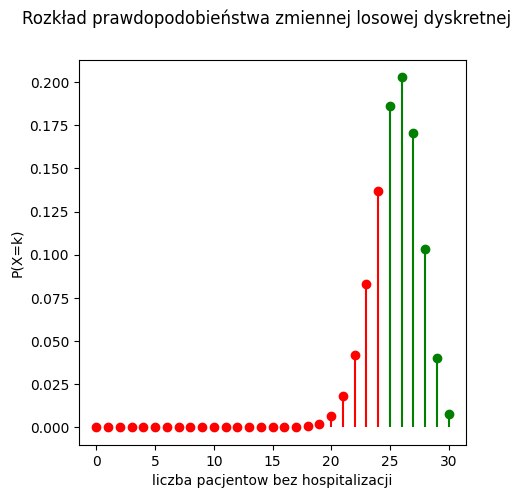

In [15]:
sukces = 0.85 
porazka = 1 - sukces 
n = 30
# k >= 25, >24 czyli dystrybuanta dla 24 i odejmuje od 1
k=24
variants = np.arange(0,n+1)
probabilities = sp.stats.binom.pmf(variants,n,sukces)
# print(probabilities)

DF = pd.DataFrame(data=probabilities, index=variants, columns=["P(X=k)"])
DF.index.name="liczba pacjentow bez hospitalizacji"
# print(DF)
mask = variants >= 25
vizualize_discrete_distribution(DF,mask)

## Zadanie 2 [6 pkt]

Przygotuj funkcję `bootstrap_var_estimation()`, która korzystając z metody bootstrap będzie dokonywała estymacji przedziałowej wartości wariancji dla danych wejściowych w postaci szeregu szczegółowego zgodnie z informacjami zawartymi w docstring funkcji oraz ze schematem omawianym w trakcie ćwiczeń.

Uwagi do wykonania zadania:
 - Wykonaj losowanie prób wg następującego schematu - kolejne próby są losowane w pętli for, a funkcja losująca próbę w kolejnych losowaniach ma ustawioną wartość parametru odpowiadającego za ziarno generatora liczb losowych na wartość `random_state`, `random_state+1`, `random_state+2` itd. 
 - Celem zadania jest napisanie funkcji od podstaw, w rozwiązaniu nie należy korzystać z gotowych funkcji służących do estymacji bootstrapowej.

In [19]:
def bootstrap_var_estimation(data, number_of_samples, alpha, random_state):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    number_of_samples: int
        Liczba prób bootstrapowych.
    alpha: float
        Wartość określająca poziom istotności.
    random_state: int
        Ziarno generatora liczb pseudolosowych.
    
    Returns
    -------
    var_low: float
        Dolna granica wyliczonego przedziału ufności.
    var_high: float
        Górna granica wyliczonego przedziału ufności.
    """       
 
    Z = 1-alpha

    boot_data = []
    for i in range(0,number_of_samples):
        boot_sample = data.sample(n=len(data),replace=True,random_state=random_state+i)
        single_data = boot_sample["X"].values.var(ddof = 1)
        boot_data.append(single_data)

    X, Y = (np.quantile(boot_data, q = alpha/2),np.quantile(boot_data,q = 1-alpha/2))

    
    print("wariancja należy do przedziału [{:.4f}, {:.4f}] przy założeniu poziomu ufności 1-𝛼 = {}".format(X,Y,Z)) 
    return (X,Y)
    

In [20]:
# Komórka testowa
result = bootstrap_var_estimation(test_data_1, 1000, 0.05, 34)
assert type(result)==tuple or type(result)==list
assert len(result)==2
assert isinstance(result[0], float)
assert isinstance(result[1], float)


wariancja należy do przedziału [0.0114, 0.0465] przy założeniu poziomu ufności 1-𝛼 = 0.95


## Zadanie 3 [6 pkt]

Przygotuj funkcję `proportion_NHST()`, która będzie weryfikować hipotezę o wartości wskaźnika struktury (proporcji)  dla danych wejściowych w postaci szeregu szczegółowego zgodnie z informacjami zawartymi w docstring funkcji oraz ze schematem omawianym w trakcie ćwiczeń.

Uwaga! Zadanie dotyczy tradycyjnej weryfikacji, nie metody bootstrap.

In [11]:
def proportion_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami próby losowej (True, False).
    H0: float
        Wartość wskaźnika struktury przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość wskaźnika struktury jest różna od wartości przyjętej w H0,
        - less: wartość wskaźnika struktury jest mniejsza od wartości przyjętej w H0,
        - greater: wartość wskaźnika struktury jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    u: float
        Wyliczona na podstawie próby losowej wartość statystyki u.
    u_alpha: float
        Wartość statystyki u_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    p = data.values.mean()
    n = len(data)
    
    u = (p - H0) / np.sqrt( H0 * (1 - H0) / n )

    u_min = sp.stats.norm.ppf(0.0001)
    u_max = sp.stats.norm.ppf(0.9999)
    u_range = np.linspace(u_min, u_max, 1000)

    u_pdf = pd.DataFrame( sp.stats.norm.pdf(u_range), u_range, columns = ["u(x)"] ) 
    u_pdf.index.name = "x"

    if H1 == "two-sided":
        u_alpha = sp.stats.norm.ppf(1 - alpha / 2)
        H = 1 if np.fabs(u) >= u_alpha else 0 
    elif H1 == "less":
        u_alpha = sp.stats.norm.ppf(alpha)
        H = 1 if u <= u_alpha else 0 
    else:
        u_alpha = sp.stats.norm.ppf(1 - alpha)
        H = 1 if u >= u_alpha else 0
    return (u, u_alpha, H)

In [12]:
# Komórka testowa
result = proportion_NHST(test_data_2, 0.25, "two-sided", 0.1)
assert type(result)==tuple or type(result)==list
assert len(result)==3
assert isinstance(result[0], float)
assert isinstance(result[1], float)
assert isinstance(result[2], float) or isinstance(result[2], int)


## Zadanie 4 [12 pkt]

Zmienna `wine` zawiera wyniki pomiarów kilku wybranych parametrów win pochodzących z tego samego rejonu Włoch, ale wyprodukowanych z trzech różnych odmian winogron:
 - Cultivar - odmiana winogron
 - Alcohol - procentowa zawartości alkoholu w winie
 - Flavanoids - rodzaj związku fenolowego
 - Color intensity - mierzy jak głęboki lub intensywny jest kolor
 - OD280/OD315 - miara absorpcji światła przy określonych długościach fal

In [13]:
wine = pd.read_csv("wine_data.csv", index_col=0)
wine

,Cultivar,Alcohol,Flavanoids,Color intensity,OD280/OD315
0,2,11.81,0.99,2.50,2.26
1,3,13.40,0.96,8.50,1.92
2,1,13.56,3.29,6.13,3.38
3,3,13.73,0.47,6.62,1.75
4,2,12.17,1.75,2.95,2.23
...,...,...,...,...,...
173,1,14.75,3.69,5.40,2.73
174,2,11.76,2.03,3.80,2.50
175,2,12.51,1.92,2.94,3.57
176,1,13.73,3.25,5.70,2.71


### a)
W oparciu o dane ze zmiennej `wine` przygotuj zestaw wykresów korelacyjnych poszczególnych par parametrów z wykresami kde na przekątnej (pairplot) zestawiające ze sobą poszczególne parametry liczbowe (osie X, Y) z podziałem na odmiany winogron (rozróżnione kolorem) i ustaw:
 - inną od domyślnej paletę kolorów (każda odmiana ma przypisany inny kolor wykresu),
 - inne od domyślnych własności punktów (kształt, wielkość, przeźroczystość) dobrane tak, aby wykres był jak najbardziej czytelny.

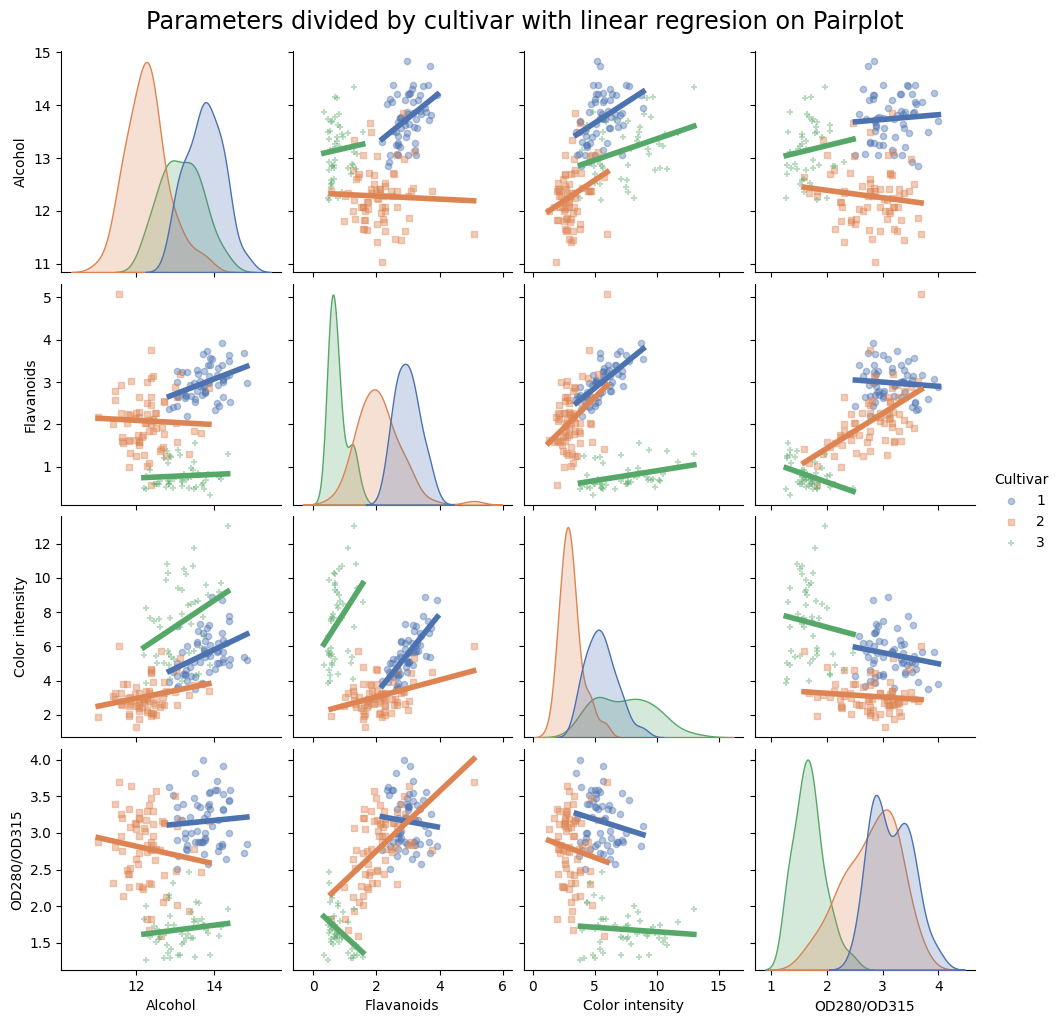

In [16]:
pair_5_cul = sns.pairplot(
    wine, 
    hue = "Cultivar", 
    palette = "deep", 
    kind = "reg", 
    plot_kws=dict( ci = None, line_kws = dict( linewidth = 4 ),
    scatter_kws = dict(alpha = 0.4, s = 20) ), 
    diag_kind="kde", 
    markers=["o", "s", "+"]
)
pair_5_cul.fig.suptitle("Parameters divided by cultivar with linear regresion on Pairplot", fontsize = "xx-large", y=1.02)
plt.show()

### b)
W oparciu o dane ze zmiennej `wine` przygotuj wykresy violinplot i swarmplot wybranego przez siebie parametru liczbowego (oś Y) z podziałem na rozróżnione kolorem odmiany winogron (oś X).

Wykresy zestaw na pojedynczej figurze (1x2 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Dodatkowo ustaw:
 - dla wykresu violinplot:
     - inne od domyślnych kolory wykresu,
 - dla wykresu swarmplot:
     - inne od domyślnych rozmiar i kolory punktów (dobierz rozmiar tak, aby na wykresie zmieścił się komplet punktów) oraz rozsunięcie poszczególnych grup punktów.

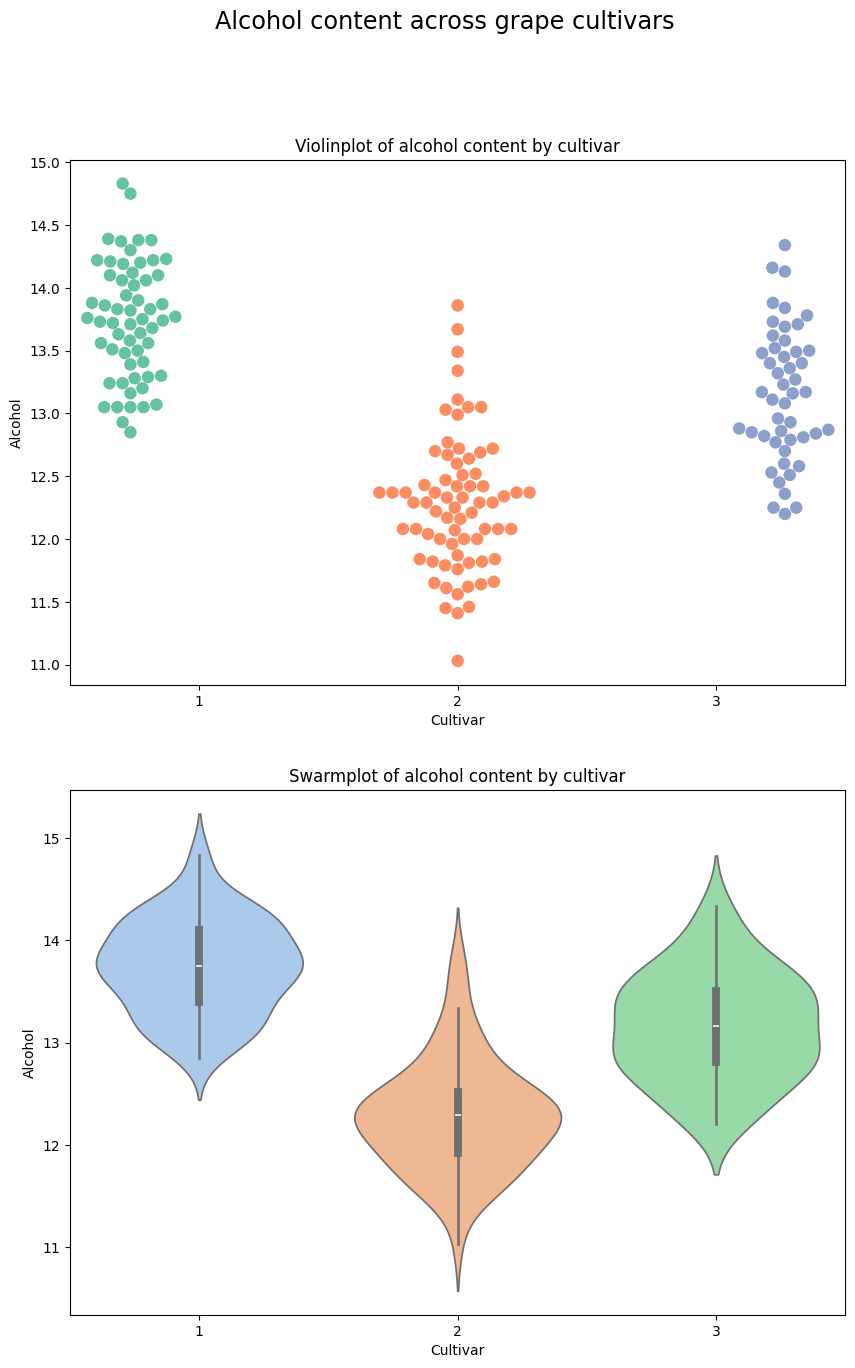

In [31]:
fig_1, ax_1 = plt.subplots(ncols = 1, nrows = 2, figsize = (10,15))

sns.swarmplot(
    data = wine,
    x = "Cultivar",
    y = "Alcohol",
    ax = ax_1[0],
    hue = "Cultivar", 
    palette = "Set2",
    size = 9,
    legend = False,
    dodge=True
)

sns.violinplot(
    data = wine,
    x = "Cultivar",
    y = "Alcohol",
    ax = ax_1[1],
    hue = "Cultivar",
    palette = "pastel",
    legend = False,

)

fig_1.suptitle("Alcohol content across grape cultivars", fontsize = "xx-large")

ax_1[0].set_title("Violinplot of alcohol content by cultivar")

ax_1[1].set_title("Swarmplot of alcohol content by cultivar")
plt.show()

### c) 

Załóżmy, że zmianna `wine` zawiera kompletną listę butelek wina znajdujących się w pewnej kolekcji. Wylosuj z niej i zapisz do zmiennej `sample` próbę losową zawierającą po 20% znajdujących się w kolekcji butelek win wykonanych z poszczególnych odmian winogron wylosowanych bez zwracania.

In [35]:
sample = wine.groupby("Cultivar").sample(frac=0.2)
sample


Liczność poszczególnych odmian w wylosowanej próbie (zmienna 'sample'):
Cultivar
2    14
1    12
3    10
Name: count, dtype: int64


In [34]:
# Komórka testowa
assert type(sample) == pd.DataFrame


### d)

Korzystając z dedykowanej do tego funkcji pakietu scipy dokonaj estymacji przedziałowej metodą bootstrap wspólczynnika a prostej regresji liniowej (ax+b) między miara absorpcji światła (oś X) i związkami fenolowymi (oś Y) na poziomie istotności 1-alpha = 0.98.

Wynik zapisz do zmiennej `a_ci` zawierającej listę lub krotkę z dolną i górną granicą przedziału ufności. Ustaw wartość argumentu funkcji odpowiadającego za ziarno generatora liczb losowych funkcji na 98.

In [39]:


def custom_linregress_a( X, Y ):
    stats = sp.stats.linregress( x = X, y = Y )
    return stats.slope

a_ci = sp.stats.bootstrap((wine["OD280/OD315"], wine["Flavanoids"]), custom_linregress_a, paired = True, confidence_level = 0.98, random_state = 98)
a_ci = (a_ci.confidence_interval.low, a_ci.confidence_interval.high)



In [40]:
# Komórka testowa
assert type(a_ci)==tuple or type(a_ci)==list
assert len(a_ci)==2
assert isinstance(a_ci[0], float)
assert isinstance(a_ci[1], float)


### e)

Korzystając z dedykowanej funkcji pakietu scipy zweryfikuj hipotezę, że zawartość alkoholu w winach wykonanych z 2. gatunku wingoron ma rozkład normalny. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.9.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue` oraz przygotuj zmienną `H` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [46]:
pvalue = sp.stats.shapiro(wine[wine["Cultivar"] == 2]["Alcohol"]).pvalue
H = 1 if pvalue<= 0.1 else 0

In [47]:
# Komórka testowa
assert isinstance(pvalue, float)
assert isinstance(H, float) or isinstance(H, int)
